In [2]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.linalg as la
import random
import statistics

# 相關係數矩陣

In [105]:
data = pd.read_csv("C:/Users/David/Desktop/Study 108-1/Data Mining/資料探勘_HW1/HW1_feature sets.csv")
data

,Cases,Class,SRLGE_q8,ZSV_q7,LRLGE_q8,SRLGE_q7,GLV_R_q6,senth_d1,LGRE_q8,SRLGE_q4,...,SRLGE_q5,energ_d3,LGRE_q7,LGZE_q4,LGZE_q6,RLV_q7,LGRE_q5,SZLGE_q6,LRLGE_q7,LGRE_q4
0,1,1,0.000077,2.120000e-05,0.000084,0.000293,0.260778,4.637041,0.000078,0.010446,...,0.003640,0.002968,0.000305,0.016404,0.001386,0.000094,0.004249,0.000710,0.000359,0.014348
1,2,1,0.000050,2.260000e-07,0.000055,0.000193,0.143818,5.522665,0.000051,0.008255,...,0.002590,0.000288,0.000200,0.017392,0.000891,0.000022,0.002899,0.000517,0.000237,0.010126
2,3,1,0.000087,1.550000e-05,0.000092,0.000335,0.241046,4.748406,0.000088,0.012796,...,0.004260,0.002303,0.000343,0.022309,0.001407,0.000095,0.004697,0.000843,0.000377,0.015621
3,4,1,0.000135,1.180000e-05,0.000147,0.000511,0.258256,4.185114,0.000137,0.017615,...,0.006090,0.002022,0.000529,0.015946,0.001853,0.000171,0.006927,0.001174,0.000612,0.022120
4,5,1,0.000031,1.790000e-06,0.000038,0.000122,0.945812,4.592705,0.000032,0.006845,...,0.001753,0.003523,0.000130,0.012259,0.000739,0.000106,0.002011,0.000565,0.000185,0.007871
5,6,1,0.000081,2.550000e-05,0.000086,0.000311,0.198481,4.720334,0.000082,0.012395,...,0.003996,0.020383,0.000318,0.017302,0.001175,0.000073,0.004288,0.000720,0.000347,0.014225
6,7,1,0.000035,3.210000e-07,0.000039,0.000137,0.337021,5.280246,0.000036,0.006612,...,0.001945,0.000533,0.000142,0.012878,0.000721,0.000037,0.002158,0.000473,0.000175,0.007814
7,8,1,0.000088,7.360000e-07,0.000098,0.000333,0.090996,5.413108,0.000090,0.011546,...,0.003943,0.000217,0.000347,0.020956,0.001167,0.000043,0.004626,0.000653,0.000415,0.015240
8,9,1,0.000055,4.910000e-06,0.000058,0.000211,0.161429,5.474238,0.000055,0.008595,...,0.002773,0.000528,0.000216,0.014054,0.000845,0.000038,0.003025,0.000508,0.000236,0.010269
9,10,1,0.000068,4.850000e-07,0.000076,0.000258,0.111655,5.378924,0.000070,0.008578,...,0.003078,0.000168,0.000271,0.012489,0.000914,0.000036,0.003682,0.000497,0.000327,0.012169


In [4]:
Pearson = np.corrcoef([data[e] for e in data])

In [5]:
Pearson = pd.DataFrame(Pearson)
Pearson.columns = data.columns
Pearson = Pearson.set_index(data.columns)
Pearson = Pearson.drop(['Cases', 'Class'])
Pearson = Pearson.drop(['Cases', 'Class'], axis=1)
Pearson = np.round(Pearson, 2)
Pearson

,SRLGE_q8,ZSV_q7,LRLGE_q8,SRLGE_q7,GLV_R_q6,senth_d1,LGRE_q8,SRLGE_q4,LGZE_q5,RLV_q6,SRLGE_q5,energ_d3,LGRE_q7,LGZE_q4,LGZE_q6,RLV_q7,LGRE_q5,SZLGE_q6,LRLGE_q7,LGRE_q4
SRLGE_q8,1.00,0.52,0.99,1.00,-0.35,-0.70,1.00,0.96,0.93,0.77,0.98,0.26,1.00,0.78,0.98,0.77,1.00,0.91,0.98,1.00
ZSV_q7,0.52,1.00,0.57,0.51,0.06,-0.64,0.53,0.41,0.54,0.72,0.44,0.34,0.53,0.41,0.59,0.71,0.53,0.40,0.61,0.54
LRLGE_q8,0.99,0.57,1.00,0.99,-0.30,-0.72,1.00,0.93,0.93,0.80,0.96,0.25,1.00,0.76,0.98,0.80,0.99,0.89,0.99,0.99
SRLGE_q7,1.00,0.51,0.99,1.00,-0.36,-0.69,1.00,0.97,0.92,0.77,0.99,0.27,1.00,0.78,0.98,0.77,1.00,0.91,0.97,1.00
GLV_R_q6,-0.35,0.06,-0.30,-0.36,1.00,-0.31,-0.34,-0.36,-0.23,0.21,-0.38,0.18,-0.34,-0.41,-0.25,0.21,-0.34,-0.20,-0.26,-0.32
senth_d1,-0.70,-0.64,-0.72,-0.69,-0.31,1.00,-0.70,-0.66,-0.74,-0.96,-0.67,-0.56,-0.70,-0.46,-0.77,-0.96,-0.71,-0.71,-0.73,-0.72
LGRE_q8,1.00,0.53,1.00,1.00,-0.34,-0.70,1.00,0.96,0.93,0.78,0.98,0.26,1.00,0.78,0.98,0.78,1.00,0.91,0.98,1.00
SRLGE_q4,0.96,0.41,0.93,0.97,-0.36,-0.66,0.96,1.00,0.86,0.73,0.99,0.31,0.96,0.80,0.93,0.72,0.96,0.92,0.90,0.96
LGZE_q5,0.93,0.54,0.93,0.92,-0.23,-0.74,0.93,0.86,1.00,0.79,0.89,0.32,0.93,0.77,0.97,0.78,0.93,0.90,0.93,0.93
RLV_q6,0.77,0.72,0.80,0.77,0.21,-0.96,0.78,0.73,0.79,1.00,0.74,0.52,0.78,0.52,0.83,1.00,0.79,0.74,0.81,0.79


In [6]:
Pearson.to_excel("C:/Users/David/Desktop/Study 108-1/Data Mining/資料探勘_HW1/相關係數.xlsx")

In [7]:
w, v = np.linalg.eig(Pearson)
w

array([ 1.55914063e+01,  2.24989022e+00,  7.80905363e-01,  6.31561794e-01,
        3.09218920e-01,  1.60853682e-01,  1.17671066e-01,  8.94799698e-02,
        3.74103909e-02,  2.17407153e-02,  1.54809869e-02,  9.86578646e-03,
        7.51934693e-03, -9.38611733e-03, -6.34116104e-03,  4.53039538e-04,
       -3.37774360e-03, -1.94617842e-03, -2.40642490e-03, -1.67849471e-18])

In [116]:
v

array([[-2.49837268e-01,  9.42237095e-02,  4.01693436e-02,
        -2.99956460e-02, -7.77923609e-02, -1.66908005e-02,
         4.01158005e-02, -1.44467741e-01, -1.87771765e-01,
        -8.14878856e-02, -8.27461440e-02, -2.59761212e-01,
         1.21014083e-01, -1.56730344e-01, -6.13854940e-02,
        -4.93095649e-01, -3.80727257e-01,  5.90381909e-01,
        -3.91638151e-02,  3.58101970e-15],
       [-1.51233777e-01, -2.77973568e-01,  2.16746473e-01,
         8.08065761e-01,  3.05494147e-02,  7.34970759e-02,
        -3.97382950e-01, -4.86761690e-02, -5.36727640e-02,
        -1.37931406e-01,  3.72567681e-02,  1.71814999e-02,
         2.88618501e-02, -1.20547294e-02, -4.76299831e-02,
         2.64392756e-02,  2.33957025e-02,  3.19349784e-02,
         6.47285369e-02,  2.77266169e-16],
       [-2.49494638e-01,  5.93134835e-02,  1.05089093e-01,
         1.36469261e-02, -6.31483131e-02,  4.00432571e-04,
         1.24483604e-01, -2.69838496e-01, -2.46227632e-02,
         3.05109841e-01,  2.1

In [8]:
"""
Pearson_2 = np.corrcoef([(data[e] - np.min(data[e]))/(np.max(data[e] - np.min(data[e]))) for e in data])

Pearson_2 = pd.DataFrame(Pearson_2)
Pearson_2.columns = data.columns
Pearson_2 = Pearson_2.set_index(data.columns)
Pearson_2 = Pearson_2.drop(['Cases', 'Class'])
Pearson_2 = Pearson_2.drop(['Cases', 'Class'], axis=1)
Pearson_2 = np.round(Pearson_2, 2)
Pearson_2
"""

"\nPearson_2 = np.corrcoef([(data[e] - np.min(data[e]))/(np.max(data[e] - np.min(data[e]))) for e in data])\n\nPearson_2 = pd.DataFrame(Pearson_2)\nPearson_2.columns = data.columns\nPearson_2 = Pearson_2.set_index(data.columns)\nPearson_2 = Pearson_2.drop(['Cases', 'Class'])\nPearson_2 = Pearson_2.drop(['Cases', 'Class'], axis=1)\nPearson_2 = np.round(Pearson_2, 2)\nPearson_2\n"

# PCA

In [9]:
new_data = data.drop(['Cases', 'Class'], axis=1)
# normalization ((xi - mean)/std)
for i in new_data:
    new_data[i] = (new_data[i] - np.mean(new_data[i]))/np.std(new_data[i], ddof=1)
new_data.head()

,SRLGE_q8,ZSV_q7,LRLGE_q8,SRLGE_q7,GLV_R_q6,senth_d1,LGRE_q8,SRLGE_q4,LGZE_q5,RLV_q6,SRLGE_q5,energ_d3,LGRE_q7,LGZE_q4,LGZE_q6,RLV_q7,LGRE_q5,SZLGE_q6,LRLGE_q7,LGRE_q4
0,0.213591,0.000397,0.180687,0.222274,-0.214647,-0.567899,0.211275,0.128856,0.651979,0.183670,0.256651,-0.084663,0.218993,0.129663,0.598606,0.232287,0.266895,0.266765,0.168730,0.301155
1,-0.538588,-0.344236,-0.524136,-0.534011,-0.861469,1.148905,-0.535505,-0.480858,-0.470942,-1.021191,-0.509518,-0.450139,-0.528146,0.379499,-0.487211,-0.984508,-0.505813,-0.633100,-0.492960,-0.488517
2,0.503319,-0.093262,0.364658,0.534142,-0.323771,-0.352014,0.479142,0.782838,0.861480,0.326641,0.709170,-0.175396,0.485875,1.623166,0.643285,0.239028,0.523665,0.889393,0.268987,0.539266
3,1.828101,-0.154059,1.687194,1.856015,-0.228593,-1.443971,1.804001,2.123918,1.392575,1.538602,2.045306,-0.213660,1.804260,0.013740,1.620670,1.527416,1.800331,2.431982,1.535591,1.754903
4,-1.056755,-0.318537,-0.923138,-1.071627,3.573766,-0.653845,-1.033359,-0.873432,-0.785351,0.420501,-1.120671,-0.008946,-1.025139,-0.918790,-0.820252,0.437120,-1.014189,-0.408261,-0.772690,-0.910271


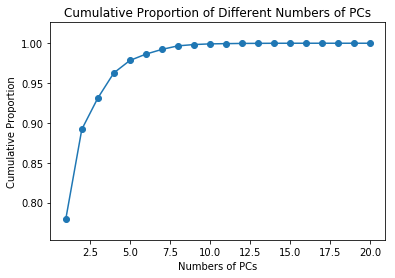

In [10]:
variation = []
for i in range(1, 21):
    pca = PCA(n_components=i)
    result = pca.fit_transform(new_data)
    variation.append(sum(pca.explained_variance_ratio_))
plt.scatter(range(1, 21), variation)
plt.plot(range(1, 21), variation)
plt.title("Cumulative Proportion of Different Numbers of PCs")
plt.xlabel("Numbers of PCs")
plt.ylabel("Cumulative Proportion");

In [11]:
pca = PCA(n_components=5)
result = pca.fit_transform(new_data)
result = pd.DataFrame(result)
result.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
result.to_excel("C:/Users/David/Desktop/Study 108-1/Data Mining/資料探勘_HW1/PCA_result.xlsx")
result.head()

,PC1,PC2,PC3,PC4,PC5
0,1.143414,-0.030710,-0.105667,-0.149285,0.058009
1,-2.285745,-1.440487,0.353131,0.643614,0.427124
2,2.369437,-0.739671,0.375072,-0.247897,1.128589
3,6.760941,-0.392444,-0.733345,-1.774756,-0.940162
4,-3.063412,3.510001,-0.817837,-1.432343,0.977139


In [12]:
print(sum(pca.explained_variance_ratio_))
pca.explained_variance_ratio_
#pca.explained_variance_
#sum(result**2)/109

0.978333842410054


array([0.77940794, 0.11250398, 0.0392547 , 0.03153343, 0.0156338 ])

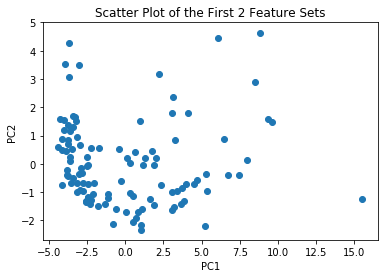

In [13]:
plt.scatter(result['PC1'], result['PC2'])
plt.title("Scatter Plot of the First 2 Feature Sets")
plt.xlabel("PC1")
plt.ylabel("PC2");

# Decision Tree

In [77]:
data.head()

,Cases,Class,SRLGE_q8,ZSV_q7,LRLGE_q8,SRLGE_q7,GLV_R_q6,senth_d1,LGRE_q8,SRLGE_q4,...,SRLGE_q5,energ_d3,LGRE_q7,LGZE_q4,LGZE_q6,RLV_q7,LGRE_q5,SZLGE_q6,LRLGE_q7,LGRE_q4
0,1,1,0.000077,2.120000e-05,0.000084,0.000293,0.260778,4.637041,0.000078,0.010446,...,0.003640,0.002968,0.000305,0.016404,0.001386,0.000094,0.004249,0.000710,0.000359,0.014348
1,2,1,0.000050,2.260000e-07,0.000055,0.000193,0.143818,5.522665,0.000051,0.008255,...,0.002590,0.000288,0.000200,0.017392,0.000891,0.000022,0.002899,0.000517,0.000237,0.010126
2,3,1,0.000087,1.550000e-05,0.000092,0.000335,0.241046,4.748406,0.000088,0.012796,...,0.004260,0.002303,0.000343,0.022309,0.001407,0.000095,0.004697,0.000843,0.000377,0.015621
3,4,1,0.000135,1.180000e-05,0.000147,0.000511,0.258256,4.185114,0.000137,0.017615,...,0.006090,0.002022,0.000529,0.015946,0.001853,0.000171,0.006927,0.001174,0.000612,0.022120
4,5,1,0.000031,1.790000e-06,0.000038,0.000122,0.945812,4.592705,0.000032,0.006845,...,0.001753,0.003523,0.000130,0.012259,0.000739,0.000106,0.002011,0.000565,0.000185,0.007871


In [ ]:
"""all_feature_sets = list(data.columns)
for i in range(100):
    data1 = data.copy()
    feature_sets = random.sample(list(data.columns[2: ]), 5)
    print(feature_sets)
    c = 1
    for j in feature_sets:
        f = [1 if data1.iloc[e, all_feature_sets.index(j)] > statistics.median(data1[j]) else 0 
             for e in range(len(data1))]
        data1['f' + str(c)] = f
        c += 1
        
    sets = []
    for a in range(2):
        for b in range(2):
            for c in range(2):
                for d in range(2):
                    for e in range(2):
                        sets.append([a, b, c, d, e])
                    
    imp_count = []
    for i in sets:
        subset = [data1.iloc[e, 1] for e in range(len(data1)) if list(data1.iloc[e, 22: 27]) == i]
        imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
        
    
    if 1 - ((77/110)**2 + (33/110)**2) - sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count]) > 0.2:
        print('\n\n')
    print(1 - ((77/110)**2 + (33/110)**2) - (1 - sum([0 if e == [0, 0] else sum([(s/sum(e))**2 for s in e])*sum(e)/110 for e in imp_count])))"""

## Gini

In [135]:
all_feature_sets = list(data.columns)

data1 = data.copy()
feature_sets = ['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if data1.iloc[e, all_feature_sets.index(j)] > statistics.median(data1[j]) else 0 
            for e in range(len(data1))]
    data1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    for f in range(2):
                        sets.append([a, b, c, d, e, f])
                    
imp_count = []
for i in sets:
    subset = [data1.iloc[e, 1] for e in range(len(data1)) if list(data1.iloc[e, 22: 28]) == i]
    imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
print(1 - ((77/110)**2 + (33/110)**2))
print(sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count]))
print(1 - ((77/110)**2 + (33/110)**2) - sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count]))

['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
0.42000000000000004
0.19170163170163168
0.22829836829836836


## Entropy

In [138]:
all_feature_sets = list(data.columns)

data1 = data.copy()
feature_sets = ['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if data1.iloc[e, all_feature_sets.index(j)] > statistics.median(data1[j]) else 0 
            for e in range(len(data1))]
    data1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    for f in range(2):
                        sets.append([a, b, c, d, e, f])
                    
imp_count = []
for i in sets:
    subset = [data1.iloc[e, 1] for e in range(len(data1)) if list(data1.iloc[e, 22: 28]) == i]
    imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
print(-((77/110)*np.log2(77/110) + (33/110)*np.log2(33/110)))
print(sum([0 if e == [0, 0] else (0 - sum([0 if s == 0 else s/sum(e)*np.log2(s/sum(e)) for s in e]))*sum(e)/110 for e in imp_count]))
print(-((77/110)*np.log2(77/110) + (33/110)*np.log2(33/110)) - sum([0 if e == [0, 0] else (0 - sum([0 if s == 0 else s/sum(e)*np.log2(s/sum(e)) for s in e]))*sum(e)/110 for e in imp_count]))

['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
0.8812908992306927
0.419105002021506
0.4621858972091867


## Gain Ratio

In [139]:
all_feature_sets = list(data.columns)

data1 = data.copy()
feature_sets = ['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if data1.iloc[e, all_feature_sets.index(j)] > statistics.median(data1[j]) else 0 
            for e in range(len(data1))]
    data1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    for f in range(2):
                        sets.append([a, b, c, d, e, f])
                    
imp_count = []
for i in sets:
    subset = [data1.iloc[e, 1] for e in range(len(data1)) if list(data1.iloc[e, 22: 28]) == i]
    imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
        
gain_split = 1 - ((77/110)**2 + (33/110)**2) - sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count])
info = -sum([0 if sum(e) == 0 else sum(e)/110*np.log2(sum(e)/110) for e in imp_count])
gain_ratio = gain_split/info
print(gain_ratio)

['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
0.06752426735541087


## Sensitivity, Specificity and Accuracy

In [143]:
all_feature_sets = list(data.columns)

data1 = data.copy()
feature_sets = ['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if data1.iloc[e, all_feature_sets.index(j)] > statistics.median(data1[j]) else 0 
            for e in range(len(data1))]
    data1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    for f in range(2):
                        sets.append([a, b, c, d, e, f])
                    
TP, FN, FP, TN = 0, 0, 0, 0
for i in sets:
    subset = [data1.iloc[e, 1] for e in range(len(data1)) if list(data1.iloc[e, 22: 28]) == i]
    one = len([e for e in subset if e == 1])
    two = len([e for e in subset if e == 2])
    # 佔比較多者為該leaf的分類 (1是negative;2是positive)
    if len(subset) > 0:
        if two > one:
            TP += len([e for e in subset if e == 2]) # 判斷為positive，實際也是positive
            FP += len([e for e in subset if e == 1]) # 判斷為positive，實際是negative
        else:
            TN += len([e for e in subset if e == 1]) # 判斷為negative，實際也是negative
            FN += len([e for e in subset if e == 2]) # 判斷為negative，實際是positive

['ZSV_q7', 'LGZE_q4', 'SZLGE_q6', 'SRLGE_q8', 'SRLGE_q4', 'GLV_R_q6']


In [145]:
print('Sensitivity=TP/(TP+FN)=', TP/(TP + FN))
print('Specificity=TN/(FP+TN)=', TN/(FP + TN))
print('Accuracy=(TP+TN)/(TP+FN+FP+TN)=', (TP + TN)/(TP + FN + FP + TN))

Sensitivity=TP/(TP+FN)= 0.7272727272727273
Specificity=TN/(FP+TN)= 0.922077922077922
Accuracy=(TP+TN)/(TP+FN+FP+TN)= 0.8636363636363636


# Repeat using feature sets derived by PCA

In [148]:
result['class'] = data['Class']
result.head()

,PC1,PC2,PC3,PC4,PC5,class
0,1.143414,-0.030710,-0.105667,-0.149285,0.058009,1
1,-2.285745,-1.440487,0.353131,0.643614,0.427124,1
2,2.369437,-0.739671,0.375072,-0.247897,1.128589,1
3,6.760941,-0.392444,-0.733345,-1.774756,-0.940162,1
4,-3.063412,3.510001,-0.817837,-1.432343,0.977139,1


## Gini

In [157]:
all_feature_sets = list(result.columns)

result1 = result.copy()
feature_sets = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if result1.iloc[e, all_feature_sets.index(j)] > statistics.median(result1[j]) else 0 
            for e in range(len(result1))]
    result1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    sets.append([a, b, c, d, e])
                    
imp_count = []
for i in sets:
    subset = [result1.iloc[e, 5] for e in range(len(result1)) if list(result1.iloc[e, 6: 11]) == i]
    imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
print(1 - ((77/110)**2 + (33/110)**2))
print(sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count]))
print(1 - ((77/110)**2 + (33/110)**2) - sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count]))

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
0.42000000000000004
0.25649153876426606
0.16350846123573398


## Entropy

In [160]:
all_feature_sets = list(result.columns)

result1 = result.copy()
feature_sets = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if result1.iloc[e, all_feature_sets.index(j)] > statistics.median(result1[j]) else 0 
            for e in range(len(result1))]
    result1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    sets.append([a, b, c, d, e])
                    
imp_count = []
for i in sets:
    subset = [result1.iloc[e, 5] for e in range(len(result1)) if list(result1.iloc[e, 6: 11]) == i]
    imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
print(-((77/110)*np.log2(77/110) + (33/110)*np.log2(33/110)))
print(sum([0 if e == [0, 0] else (0 - sum([0 if s == 0 else s/sum(e)*np.log2(s/sum(e)) for s in e]))*sum(e)/110 for e in imp_count]))
print(-((77/110)*np.log2(77/110) + (33/110)*np.log2(33/110)) - sum([0 if e == [0, 0] else (0 - sum([0 if s == 0 else s/sum(e)*np.log2(s/sum(e)) for s in e]))*sum(e)/110 for e in imp_count]))

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
0.8812908992306927
0.5549514981321245
0.3263394010985682


## Gain Ratio

In [161]:
all_feature_sets = list(result.columns)

result1 = result.copy()
feature_sets = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if result1.iloc[e, all_feature_sets.index(j)] > statistics.median(result1[j]) else 0 
            for e in range(len(result1))]
    result1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    sets.append([a, b, c, d, e])
                    
imp_count = []
for i in sets:
    subset = [result1.iloc[e, 5] for e in range(len(result1)) if list(result1.iloc[e, 6: 11]) == i]
    imp_count.append([len([e for e in subset if e == 1]), len([e for e in subset if e == 2])])
gain_split = 1 - ((77/110)**2 + (33/110)**2) - sum([0 if e == [0, 0] else (1 - sum([(s/sum(e))**2 for s in e]))*sum(e)/110 for e in imp_count])
info = -sum([0 if sum(e) == 0 else sum(e)/110*np.log2(sum(e)/110) for e in imp_count])
gain_ratio = gain_split/info
print(gain_ratio)

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
0.0387405127743689


## Sensitivity, Specificity and Accuracy

In [164]:
all_feature_sets = list(result.columns)

result1 = result.copy()
feature_sets = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
print(feature_sets)
c = 1
for j in feature_sets:
    f = [1 if result1.iloc[e, all_feature_sets.index(j)] > statistics.median(result1[j]) else 0 
            for e in range(len(result1))]
    result1['f' + str(c)] = f
    c += 1
        
sets = []
for a in range(2):
    for b in range(2):
        for c in range(2):
            for d in range(2):
                for e in range(2):
                    sets.append([a, b, c, d, e])
TP, FN, FP, TN = 0, 0, 0, 0
                    
imp_count = []
r = []
for i in sets:
    subset = [result1.iloc[e, 5] for e in range(len(result1)) if list(result1.iloc[e, 6: 11]) == i]
    one = len([e for e in subset if e == 1])
    two = len([e for e in subset if e == 2])
    # 佔比較多者為該leaf的分類 (1是negative;2是positive)
    if len(subset) > 0:
        if two > one:
            TP += len([e for e in subset if e == 2]) # 判斷為positive，實際也是positive
            FP += len([e for e in subset if e == 1]) # 判斷為positive，實際是negative
            r.append('positive')
        else:
            TN += len([e for e in subset if e == 1]) # 判斷為negative，實際也是negative
            FN += len([e for e in subset if e == 2]) # 判斷為negative，實際是positive
            r.append('negative')
    else:
        r.append('')
r

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']


['',
 '',
 'negative',
 '',
 '',
 '',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 '',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 '',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 '']

In [163]:
print('Sensitivity=TP/(TP+FN)=', TP/(TP + FN))
print('Specificity=TN/(FP+TN)=', TN/(FP + TN))
print('Accuracy=(TP+TN)/(TP+FN+FP+TN)=', (TP + TN)/(TP + FN + FP + TN))

Sensitivity=TP/(TP+FN)= 0.5151515151515151
Specificity=TN/(FP+TN)= 0.935064935064935
Accuracy=(TP+TN)/(TP+FN+FP+TN)= 0.8090909090909091
